In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
TRAINING_PATH = '/content/drive/MyDrive/1:1_Hanish_Acharla/Dataset/Final_Dataset/Train'
VALIDATION_PATH = '/content/drive/MyDrive/1:1_Hanish_Acharla/Dataset/Final_Dataset/Validation'

In [4]:
def create_model(base_model, num_classes):
    import tensorflow as tf
    # Grab the last layer and add a few extra layers to it
    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    # Dense layer 1
    x=tf.keras.layers.Dense(100,activation='relu', kernel_initializer=tf.keras.initializers.VarianceScaling(), use_bias=True)(x)
    # Final layer with softmax activation
    preds=tf.keras.layers.Dense(num_classes,activation='softmax', kernel_initializer=tf.keras.initializers.VarianceScaling(), use_bias=False)(x)
    # Create the final model
    model=Model(inputs=base_model.input,outputs=preds)
    return model

In [5]:
def get_optimizer(optimizer_name, learning_rate):
    # Import keras optimizers
    from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad, Adamax, Ftrl, Nadam, RMSprop, SGD
    print('Selected Optimizer', optimizer_name)
    switcher = {
        'Adadelta': Adadelta(learning_rate=learning_rate),
        'Adagrad': Adagrad(learning_rate=learning_rate),
        'Adam': Adam(learning_rate=learning_rate),
        'Adamax': Adamax(learning_rate=learning_rate),
        'FTRL': Ftrl(learning_rate=learning_rate),
        'NAdam': Nadam(learning_rate=learning_rate),
        'RMSprop': RMSprop(learning_rate=learning_rate),
        'Gradient Descent': SGD(learning_rate=learning_rate)
    }
    # If optimizer_name is empty, Adam will be return as default optimizer
    return switcher.get(optimizer_name, Adam(learning_rate=learning_rate))

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.callbacks import EarlyStopping
from tensorflow import keras

In [7]:
# Initialize hyper params
epochs = 10 #<-- increase for higher accuracy
base_learning_rate = 0.0001 #decrease for different results; use excel sheet to note down results from each change to learning rate and epochs
optimizer = 'Adam'
BATCH_SIZE = 32

In [8]:
IMG_SIZE = (224, 224)
# Create the data generation pipeline for training and validation
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory(TRAINING_PATH,
                                                target_size=IMG_SIZE,
                                                color_mode='rgb',
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=True,
                                                )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_PATH,
                                                target_size=IMG_SIZE,
                                                color_mode='rgb',
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=True,
                                                )
print(validation_generator.class_indices.keys())

Found 14307 images belonging to 6 classes.
Found 1773 images belonging to 6 classes.
dict_keys(['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab'])


In [9]:
# Download the model, valid alpha values [0.25,0.35,0.5,0.75,1]
base_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable=False
# Specify the number of classes
num_classes = 6
# Create the base model
model = create_model(base_model,num_classes)
print(len(base_model.layers))

175


In [10]:
model.compile(optimizer = get_optimizer(optimizer_name=optimizer,learning_rate=base_learning_rate),loss='CategoricalCrossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=30,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
step_size_train = train_generator.n//train_generator.batch_size
history_fine = model.fit(train_generator,
                        epochs=epochs,
                        validation_data = validation_generator,
                        verbose=1)

Selected Optimizer Adam
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 957s 2s/step - accuracy: 0.5510 - loss: 1.2091 - val_accuracy: 0.7586 - val_loss: 0.7104
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 977s 2s/step - accuracy: 0.7767 - loss: 0.6498 - val_accuracy: 0.7930 - val_loss: 0.6025
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 876s 2s/step - accuracy: 0.8096 - loss: 0.5589 - val_accuracy: 0.8094 - val_loss: 0.5503
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1078s 2s/step - accuracy: 0.8345 - loss: 0.5002 - val_accuracy: 0.8218 - val_loss: 0.5217
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 972s 2s/step - accuracy: 0.8463 - loss: 0.4622 - val_accuracy: 0.8381 - val_loss: 0.4886
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1014s 2s/step - accuracy: 0.8535 - loss: 0.4419 - val_accuracy: 0.8291 - val_loss: 0.4950
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 879s 2s/step - accuracy: 0.8625 - loss: 0.4103 - val_accuracy: 0.8455 - val_loss: 0.4651
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1022s 2s/step - accuracy: 0.8668 - loss: 0.3919 - val_accuracy: 0.

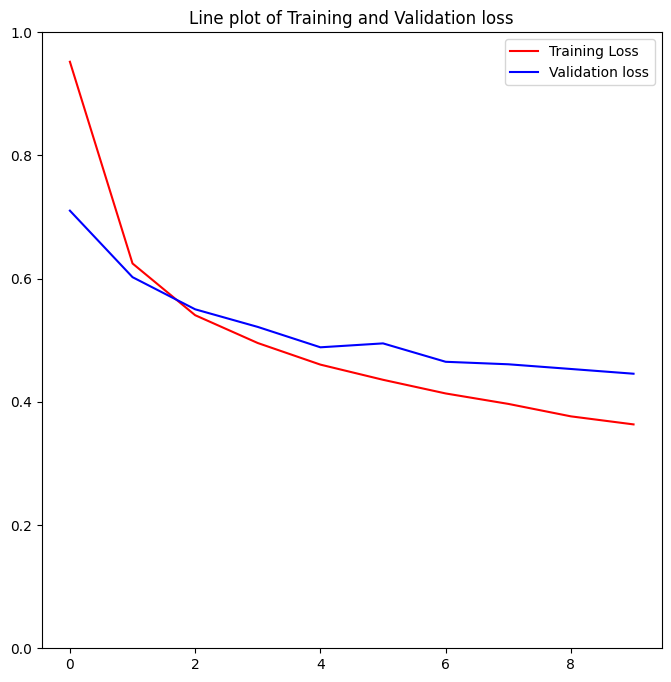

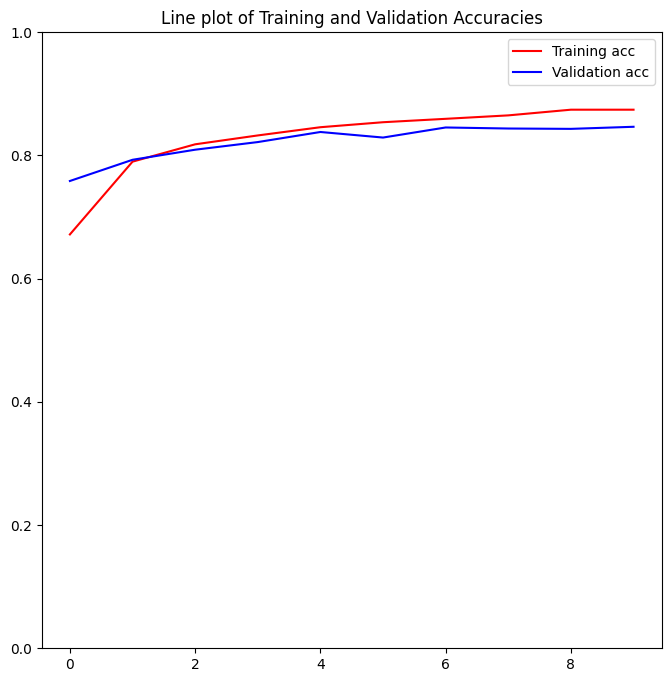

In [11]:
def visualization():
    import pandas as pd
    df = pd.DataFrame(history_fine.history)
    #loss plots
    plt.figure(figsize=(8,8))
    plt.plot(df['loss'], color='red', label = "Training_loss")
    plt.plot(df['val_loss'], color='blue')
    plt.legend(['Training Loss','Validation loss'],loc = 'best' )
    plt.title('Line plot of Training and Validation loss')
    plt.ylim(0,1)
    plt.show()
    #accuracy plots
    plt.figure(figsize=(8,8))
    plt.plot(df['accuracy'], color='red')
    plt.plot(df['val_accuracy'], color='blue')
    plt.legend(['Training acc','Validation acc'],loc = 'best' )
    plt.title('Line plot of Training and Validation Accuracies')
    plt.ylim(0,1)
    plt.show()
visualization()

In [12]:
# Import numpy for calculating best model accuracy
import numpy as np
# Populating matrics -> accuracy & loss
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
print('Training Accuracy: ', acc)
print('Validation Accuracy: ', val_acc)
print('Training Loss: ', loss)
print('Validation Loss: ', val_loss)
best_model_accuracy = history_fine.history['val_accuracy'][np.argmin(history_fine.history['val_loss'])]
print('best model accuracy: ', best_model_accuracy)

Training Accuracy:  [0.6718389391899109, 0.7899629473686218, 0.8181309700012207, 0.8325295448303223, 0.8458796143531799, 0.8539875745773315, 0.8595093488693237, 0.8651009798049927, 0.8743272423744202, 0.8743272423744202]
Validation Accuracy:  [0.7586012482643127, 0.793006181716919, 0.8093626499176025, 0.8217710256576538, 0.8381274938583374, 0.8291032314300537, 0.8454596996307373, 0.8437676429748535, 0.843203604221344, 0.8465877175331116]
Training Loss:  [0.952140748500824, 0.6246771216392517, 0.5407111048698425, 0.49553361535072327, 0.46048498153686523, 0.4358516037464142, 0.41367971897125244, 0.3967309296131134, 0.37649005651474, 0.36343449354171753]
Validation Loss:  [0.7104342579841614, 0.6024520397186279, 0.5502912998199463, 0.5216708779335022, 0.4885907769203186, 0.4949548840522766, 0.46508345007896423, 0.46103405952453613, 0.4534063935279846, 0.44571083784103394]
best model accuracy:  0.8465877175331116


In [13]:
def seperate_labels(generator):
    x_validation = []
    y_validation = []
    num_seen = 0
    for x, labels in generator:
        x_validation.append(x)
        y_validation.append([argmax(label) for label in labels])
        num_seen += len(x)
        if num_seen == generator.n: break
    x_validation = np.concatenate(x_validation)
    y_validation = np.concatenate(y_validation)
    return x_validation, y_validation

In [14]:
# Calculate and display the confusion matrix
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import argmax
from sklearn.metrics import ConfusionMatrixDisplay
x_validation, y_validation = seperate_labels(validation_generator)
y_pred = model.predict(x_validation, batch_size=BATCH_SIZE)
predictions = np.apply_along_axis(argmax, 1, y_pred)
display_labels = validation_generator.class_indices.keys()

56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step


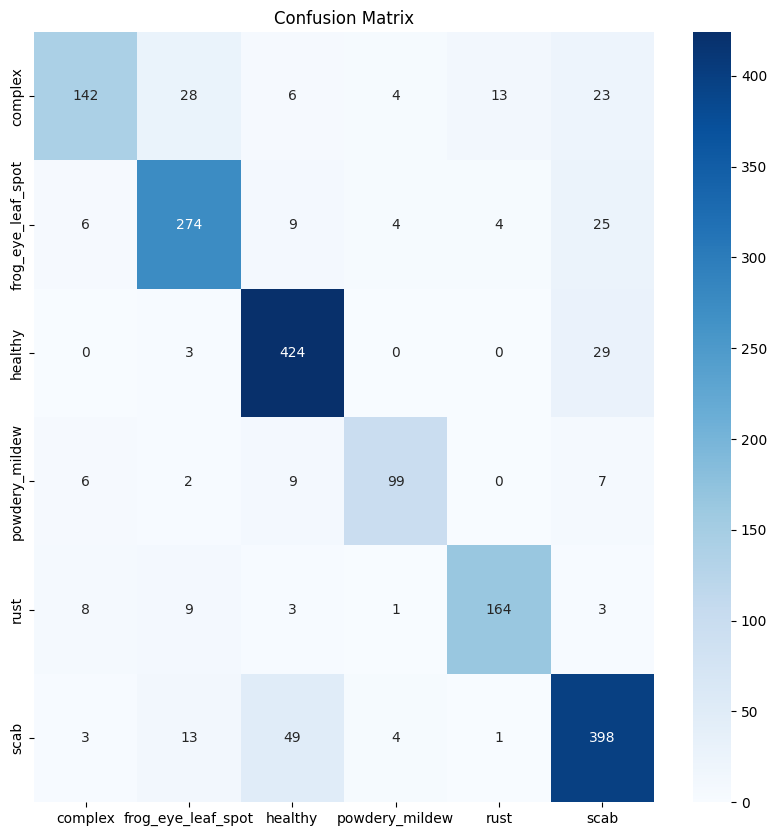

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(y_validation, predictions), annot = True, fmt = 'g', cmap = "Blues",xticklabels=display_labels, yticklabels=display_labels)
plt.title("Confusion Matrix")
plt.show()

In [16]:
print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

           0       0.86      0.66      0.75       216
           1       0.83      0.85      0.84       322
           2       0.85      0.93      0.89       456
           3       0.88      0.80      0.84       123
           4       0.90      0.87      0.89       188
           5       0.82      0.85      0.84       468

    accuracy                           0.85      1773
   macro avg       0.86      0.83      0.84      1773
weighted avg       0.85      0.85      0.84      1773



In [17]:
model.save("/content/drive/MyDrive/1:1_Hanish_Acharla/Models/ResNet_50_Best_Model.h5")